In [1]:
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
mta_engine = create_engine('sqlite:///mta.db')
from ggplot import *

In [2]:
df = pd.read_sql('select * from clean_data order by station, day', mta_engine)

In [3]:
df['day'] =  df.day.map(lambda x: pd.to_datetime(x))
df['dow'] = df.day.map(lambda x: x.weekday()) #0 == Monday
df['month'] = df.day.map(lambda x: x.month)
df['year'] = df.day.map(lambda x: x.year) #0 == Monday
df['delta'] = df.entries - df.exits

In [18]:
frank = df[df.station == 'FRANKLIN AVE'].copy()
frank_lng = pd.melt(frank, id_vars=['day', 'dow', 'month', 'year', 'station'])
frank_lng

,day,dow,month,year,station,variable,value
0,2010-04-17,5,4,2010,FRANKLIN AVE,entries,10268
1,2010-04-18,6,4,2010,FRANKLIN AVE,entries,10368
2,2010-04-19,0,4,2010,FRANKLIN AVE,entries,18087
3,2010-04-20,1,4,2010,FRANKLIN AVE,entries,18842
4,2010-04-21,2,4,2010,FRANKLIN AVE,entries,18759
5,2010-04-22,3,4,2010,FRANKLIN AVE,entries,16000
6,2010-04-23,4,4,2010,FRANKLIN AVE,entries,15230
7,2010-05-01,5,5,2010,FRANKLIN AVE,entries,11935
8,2010-05-02,6,5,2010,FRANKLIN AVE,entries,10853
9,2010-05-03,0,5,2010,FRANKLIN AVE,entries,17393


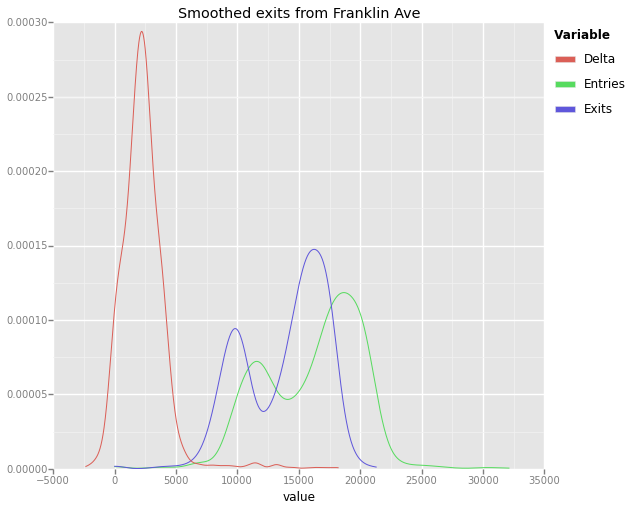

<ggplot: (-9223372036562188270)>

In [19]:
ggplot(aes(x='value', colour='variable'), data=frank_lng) + \
    geom_density() + \
    ggtitle("Smoothed exits from Franklin Ave")

In [23]:
gb = frank.groupby(['year', 'month']).agg(sum)

In [33]:
gb

entries   exits  dow   delta
year month                              
2010 4       107554  102190   21    5364
     5       349943  331744   74   18199
     6       442996  418187   87   24809
     7       403502  385335   91   18167
     8       324794  295428   75   29366
     9       465132  433998   89   31134
     10      489900  459962   99   29938
     11      472306  433179   85   39127
     12      468086  416784   93   51302
2011 1       445896  422592   95   23304
     2       452279  411786   84   40493
     3       501278  469594   90   31684
     4       452206  417491   93   34715
     5       491783  450233   91   41550
     6       465044  439864   89   25180
     7       432914  403101   99   29813
     8       414182  379552   87   34630
     9       369921  331352   70   38569
     10      536980  457294   95   79686
     11      482188  428744   87   53444
     12      481127  426565   96   54562
2012 1       468354  425779   91   42575
     2       473310  426191   86   47119
     3       520807  465981   96   54826
     4       450612  391322   79   59290
     5       477637  385222   80   92415
     6       487054  430822   93   56232
     7       363924  324285   70   39639
     8       366674  323089   72   43585
     9       499485  435215   95   64270
...             ...     ...  ...     ...
2013 3       517817  432081   99   85736
     4       539403  456557   85   82846
     5       541531  462140   93   79391
     6       464374  393583   84   70791
     7       406643  339221   77   67422
     8       475711  398312   96   77399
     9       527394  424748   90  102646
     10      574695  464741   90  109954
     11      514466  417401   93   97065
     12      497576  398975   91   98601
2014 1       513897  410537   93  103360
     2       474757  375092   84   99665
     3       544735  416714   95  128021
     4       515849  403301   87  112548
     5       713326  470899   96  242427
     6       536711  432581   90  104130
     7       499773  408739   90   91034
     8       488642  416066   99   72576
     9       553750  448080   85  105670
     10      579287  467388   93  111899
     11      395768  323751   74   72017
     12      465538  366586   87   98952
2015 1       477002  391315   96   85687
     2       420588  357209   84   63379
     3       495850  412614   91   83236
     4       463686  397948   89   65738
     5       477530  409444   99   68086
     6       450409  388159   85   62250
     7       430726  379759   93   50967
     8       279768  243637   63   36131

[65 rows x 4 columns]

In [32]:
gb.unstack()['entries'].diff()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,344652,141840,22048,29412,89388,-95211,47080,9882,13041
2012,22458,21031,19529,-1594,-14146,22010,-68990,-47508,129564,-15221,-51187,37426
2013,94454,206,-2990,88791,63894,-22680,42719,109037,27909,52936,83465,-20977
2014,-48911,1241,26918,-23554,171795,72337,93130,12931,26356,4592,-118698,-32038
2015,-36895,-54169,-48885,-52163,-235796,-86302,-69047,-208874,NaN,NaN,NaN,NaN


In [28]:
gb.unstack()['exits'].dropna()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,422592,411786,469594,417491,450233,439864,403101,379552,331352,457294,428744,426565
2012,425779,426191,465981,391322,385222,430822,324285,323089,435215,438309,367032,424496
2013,445354,411268,432081,456557,462140,393583,339221,398312,424748,464741,417401,398975
2014,410537,375092,416714,403301,470899,432581,408739,416066,448080,467388,323751,366586


In [21]:
frank[['entries', 'exits']].sum()

entries    30502707
exits      26116918
dtype: float64

In [58]:
frank.loc[pd.np.argmin(frank.delta)]

station    FRANKLIN AVE
day          2012-09-03
entries           13768
exits             16115
delta             -2347
Name: 424247, dtype: object

In [8]:
frank.day.iloc[0].month

4